<a href="https://colab.research.google.com/github/Chan0226/Recommendation-system/blob/main/%ED%98%91%EC%97%85%ED%95%84%ED%84%B0%EB%A7%81_%ED%96%89%EB%A0%AC%EB%B6%84%ED%95%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rating_data = pd.read_csv('/content/ratings_small.csv')
movie_data = pd.read_csv('/content/movies.csv')

In [ ]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
# 전처리
rating_data = rating_data.drop('timestamp',axis=1)

In [ ]:
movie_data['movieId'].astype(str)
rating_data['movieId'].astype(str)

0           31
1         1029
2         1061
3         1129
4         1172
          ... 
99999     6268
100000    6269
100001    6365
100002    6385
100003    6565
Name: movieId, Length: 100004, dtype: object

In [ ]:
movie_rating_df = pd.merge(movie_data,rating_data[['userId','movieId', 'rating']],on='movieId')

In [ ]:
movie_rating_df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0
...,...,...,...,...,...
99999,161944,The Last Brickmaker in America (2001),Drama,287,5.0
100000,162376,Stranger Things,Drama,73,4.5
100001,162542,Rustom (2016),Romance|Thriller,611,5.0
100002,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611,3.0


In [ ]:
user_movie_rating = movie_rating_df.pivot_table('rating',index='title', columns='userId').fillna(0)
user_movie_rating.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$9.99 (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 사용자 - 영화
# 영화 - 사용자 기준으로 만들어서 특정 영화를 추천
print(user_movie_rating.values.shape)
print(user_movie_rating.values.T.shape) 

(9064, 671)
(671, 9064)


In [ ]:
type(user_movie_rating.values)

numpy.ndarray

In [ ]:
movie_user_rating = user_movie_rating.values

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

(9064, 12)

In [ ]:
matrix[0]

array([ 0.01227491,  0.00250776,  0.01554807, -0.0339726 , -0.01445213,
        0.00347977, -0.00230854,  0.04490716, -0.01668943, -0.02291823,
        0.01159151, -0.00480462])

In [ ]:
corr = np.corrcoef(matrix)
corr.shape

(9064, 9064)

In [ ]:
corr2 = corr[:200,:200]

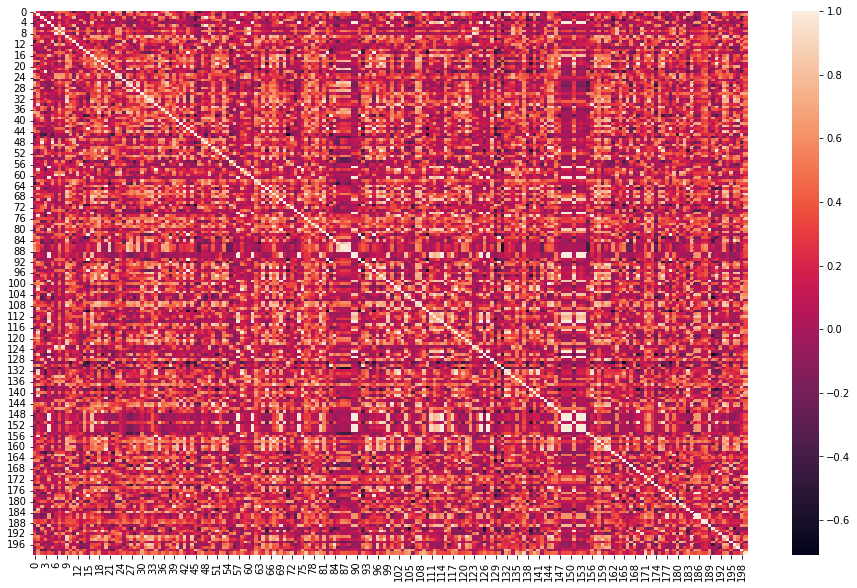

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,10))
sns.heatmap(corr2)

In [ ]:
movie_title = user_movie_rating.index
movie_title_list = list(movie_title)
index = movie_title_list.index('Big Town, The (1987)')

In [ ]:
movie_title[corr[index] >=0.9][:10]

Index(['Any Which Way You Can (1980)', 'Author! Author! (1982)',
       'Bad Influence (1990)', 'Best Friends (1982)',
       'Best Little Whorehouse in Texas, The (1982)', 'Betrayed (1988)',
       'Betsy's Wedding (1990)', 'Big Town, The (1987)',
       'Billy Bathgate (1991)', 'Blaze (1989)'],
      dtype='object', name='title')

In [ ]:
def matrixSimulation(title, top):
  index = movie_title_list.index(title)
  return list(movie_title[corr[index] >= 0.9][:top])

In [ ]:
matrixSimulation('Captain America: Civil War (2016)',10)

['2 Guns (2013)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adventures of Tintin, The (2011)',
 'Amazing Spider-Man, The (2012)',
 'Ant-Man (2015)',
 'Avengers, The (2012)',
 'Avengers: Age of Ultron (2015)',
 'Batman v Superman: Dawn of Justice (2016)',
 'Batman: The Dark Knight Returns, Part 2 (2013)']

In [ ]:
# 개인화 시스템

In [ ]:
# 사용자, 영화(영화아이디), rating
user_movie_rating.T

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And God Spoke (1993),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Attitudes (2001),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),"10th Kingdom, The (2000)","11'09""01 - September 11 (2002)",11:14 (2003),12 Angry Men (1957),12 Angry Men (1997),12 Years a Slave (2013),127 Hours (2010),12:08 East of Bucharest (A fost sau n-a fost?) (2006),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Tzameti (2005),"13th Warrior, The (1999)",...,Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zardoz (1974),Zathura (2005),Zatoichi on the Road (Zatôichi kenka-tabi) (Zatôichi 5) (1963),Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zenon: Girl of the 21st Century (1999),Zenon: The Zequel (2001),Zenon: Z3 (2004),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zerophilia (2005),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),Zombieland (2009),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoot Suit (1981),Zootopia (2016),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
movie_data.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
rating_data.head(1)

,userId,movieId,rating
0,1,31,2.5


In [ ]:
df_user_movie_rating = rating_data.pivot_table('rating',index = 'userId', columns='movieId').fillna(0)

In [ ]:
df_user_movie_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
matrix = df_user_movie_rating.values

In [ ]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [ ]:
matrix.shape

(671, 9066)

In [ ]:
user_ratings_mean = np.mean(matrix, axis = 1)

In [ ]:
matrix_user_mean = matrix - user_ratings_mean.reshape(-1,1)

In [ ]:
matrix_user_mean.shape

(671, 9066)

In [ ]:
matrix_user_mean

array([[-0.00562541, -0.00562541, -0.00562541, ..., -0.00562541,
        -0.00562541, -0.00562541],
       [-0.02923009, -0.02923009, -0.02923009, ..., -0.02923009,
        -0.02923009, -0.02923009],
       [-0.02007501, -0.02007501, -0.02007501, ..., -0.02007501,
        -0.02007501, -0.02007501],
       ...,
       [-0.01367748, -0.01367748, -0.01367748, ..., -0.01367748,
        -0.01367748, -0.01367748],
       [ 3.98698434, -0.01301566, -0.01301566, ..., -0.01301566,
        -0.01301566, -0.01301566],
       [ 4.95030885, -0.04969115, -0.04969115, ..., -0.04969115,
        -0.04969115, -0.04969115]])

In [ ]:
df = pd.DataFrame(matrix_user_mean, columns=df_user_movie_rating.columns)
df.index += 1 # 행 인덱스 0 제거
df

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
1,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,2.494375,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,...,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625
2,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,3.970770,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,4.970770,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,4.970770,-0.029230,-0.029230,...,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230
3,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,...,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075
4,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,3.902162,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,4.902162,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,...,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838
5,-0.043128,-0.043128,3.956872,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,3.956872

In [ ]:
from scipy.sparse.linalg import svds

In [ ]:
 U, sigma, Vt = svds(matrix_user_mean,k = 12)

In [ ]:
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(671, 12)
(12,)
(12, 9066)


In [ ]:
sigma =  np.diag(sigma)
sigma.shape

(12, 12)

In [ ]:
sigma[0]

array([105.72437051,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [ ]:
a = np.array([1,2,3])
b = np.array([10,20,30])
np.dot(a,b)
#a.shape

140

In [ ]:
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings,columns=df_user_movie_rating.columns)
df_svd_preds.index +=1
df_svd_preds

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,...,155820,156025,156387,156607,156609,156726,157200,157296,157407,157667,158238,158314,158528,158956,159093,159462,159690,159755,159858,159972,160080,160271,160438,160440,160563,160565,160567,160590,160656,160718,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
1,-0.079686,0.021779,-0.013837,-0.005870,-0.028877,0.032371,0.000715,-0.004428,-0.005219,0.038195,0.016529,0.005170,0.001626,-0.005785,0.012191,0.035154,-0.003522,-0.014232,0.003249,-0.000856,0.051961,0.003574,0.000443,0.026025,0.003044,0.004454,-0.008929,0.009934,0.028403,-0.006952,0.009034,0.020068,0.035193,0.002793,-0.025641,-0.003540,-0.002402,0.024249,-0.003985,-0.016380,...,-0.003824,-0.005378,-0.003989,-0.005605,-0.001955,0.013038,-0.003296,-0.002892,-0.003944,-0.003296,0.019296,-0.005399,-0.001182,-0.006048,-0.004537,0.010478,-0.002767,-0.003824,0.017265,-0.004352,-0.003824,-0.002239,-0.006509,-0.003944,-0.004459,-0.002767,-0.000654,-0.005847,-0.004101,-0.003989,-0.004324,-0.004352,0.010478,-0.004256,-0.003944,-0.005674,0.018157,-0.005575,-0.005297,-0.003766
2,1.428452,1.608841,0.529476,0.168278,0.520809,1.107473,0.529719,0.089376,0.296270,1.970031,1.334344,0.118010,0.074826,0.268758,0.120281,0.537446,1.121948,0.172813,1.024733,0.156633,1.303286,0.764510,0.437088,0.133792,1.007832,0.040924,0.173616,0.192708,0.375512,0.142522,0.731898,1.663473,2.026017,0.223532,0.963040,0.015549,-0.003812,1.865005,0.084174,0.178060,...,-0.004103,0.003787,0.021431,-0.002261,-0.003485,0.024201,-0.005930,-0.011921,-0.007644,-0.005930,0.014927,-0.004646,-0.013242,-0.003568,-0.004771,0.020680,-0.007758,-0.004103,0.009578,-0.002275,-0.004103,-0.009586,-0.022052,-0.007644,-0.020560,-0.007758,-0.015069,0.011748,0.018696,0.021431,0.013227,-0.002275,0.020680,-0.005245,-0.007644,-0.021019,0.031243,-0.000957,-0.000753,0.026901
3,0.977246,0.396971,0.000299,0.027444,0.021287,0.141458,-0.057134,0.031633,-0.012538,0.383576,0.220850,-0.038466,0.019204,-0.045240,-0.027879,0.269027,0.098080,0.059854,0.281547,-0.015141,0.161387,0.099303,0.081652,-0.033176,0.188148,-0.025235,0.015483,-0.033352,0.101483,0.051774,0.099001,0.590749,0.504426,0.031071,0.295001,0.018826,-0.023755,0.436133,0.005341,0.052381,...,-0.001449,0.018165,-0.002340,0.014027,-0.016947,-0.018432,-0.007804,-0.038814,-0.006007,-0.007804,-0.067163,0.020456,-0.033227,0.018295,0.002262,-0.014190,-0.014160,-0.001449,-0.069277,0.004907,-0.001449,-0.020515,0.002123,-0.006007,-0.013010,-0.014160,-0.039582,0.031612,-0.000640,-0.002340,0.002761,0.004907,-0.014190,-0.000251,-0.006007,-0.003189,-0.026916,0.014637,0.013287,-0.005741
4,1.870844,1.169993,0.252202,0.094831,-0.181713,-0.511953,-0.027820,-0.143080,0.013247,1.461694,0.719000,0.198060,0.135096,-0.546576,0.038095,0.086534,0.237819,-0.157608,0.520049,-0.010963,1.096399,-0.199695,-0.195134,0.141320,-0.376868,0.082517,-0.264907,-0.099196,0.696930,-0.173210,-0.092670,1.140086,1.475077,0.061266,-0.313946,0.040786,0.096345,1.610197,0.000953,-0.209323,...,-0.040754,-0.012327,0.050500,-0.038387,-0.044972,0.066084,-0.054264,-0.041599,0.034544,-0.054264,-0.017077,0.025852,-0.108300,-0.013064,-0.036227,0.054681,-0.067773,-0.040754,-0.041989,-0.027245,-0.040754,-0.081282,-0.028956,0.034544,-0.058357,-0.067773,-0.121809,0.065424,0.042471,0.050500,0.026412,-0.027245,0.054681,0.018450,0.034544,-0.035740,0.088889,-0.019365,-0.017113,0.066559
5,1.182777,0.924903,0.075998,0.061505,0.602680,-0.159825,0.339925,0.081534,-0.079666,0.535018,0.909278,-0.009722,-0.017869,-0.119970,0.049103,0.414719,0.557867,-0.033698,0.662183,0.016655,0.138584,0.019828,-0.006155,0.252244,-0.166409,0.009711,0.081686,0.172767,-0.104868,-0.168075,0.285302,-0.221550,1.128031,-0.170608,0.029838,-0.012698,-0.044847,1.551725,-0.018612,-0.142095,...,-0.033218,-0.006703,-0.031301,-0.027164,-0.011842,0.014824,-0.037080,-0.077254,-0.030890,-0.037080,-0.006448,-0.020813,-0.052527,-0.036681,-0.043567,0.00

In [ ]:
def recommendationFunction(userId,top):
  # 사용자 평점이 높은 순으로 정렬된 영화
  sorted_user_predictions  = df_svd_preds.iloc[userId].sort_values(ascending = False)

  # 원래 사용자가 평가한 영화
  user_data = rating_data[rating_data.userId == userId]
  user_data['movieId'].astype(str)
  movie_data['movieId'].astype(str)
  user_history =  user_data.merge(movie_data,  on = 'movieId').sort_values(['rating'],ascending=False )
  
  # 원본에서 자기가 본 영화를 제외한 데이터
  recommendation =  movie_data[~movie_data['movieId'].isin(user_data['movieId'])]
  d = {
    'movieId':sorted_user_predictions.index,
    'pred':sorted_user_predictions.values
  }
  # 사용자의영화 평점이 높은 영화 recommendation 
  recommendation =  recommendation.merge(pd.DataFrame(data=d), on = 'movieId' )
  recommendation = recommendation.sort_values('pred', ascending = False).iloc[:top]
  return recommendation

In [ ]:
# d = {
#   'movieId':sorted_user_predictions.index,
#   'pred':sorted_user_predictions.values
# }
# a = pd.DataFrame(data=d)
# a

In [ ]:
recommendationFunction(1,5)

,movieId,title,genres,pred
320,356,Forrest Gump (1994),Comedy|Drama|Romance|War,3.666314
265,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,3.633516
283,318,"Shawshank Redemption, The (1994)",Crime|Drama,3.416020
522,590,Dances with Wolves (1990),Adventure|Drama|Western,3.414863
128,150,Apollo 13 (1995),Adventure|Drama|IMAX,3.410564
